In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('advertising.csv')


In [2]:
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

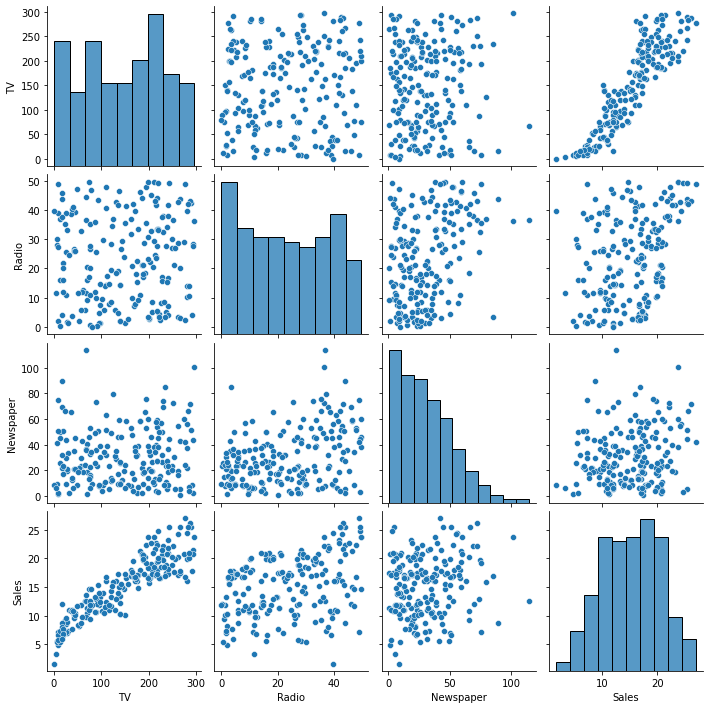

In [7]:
sns.pairplot(df)

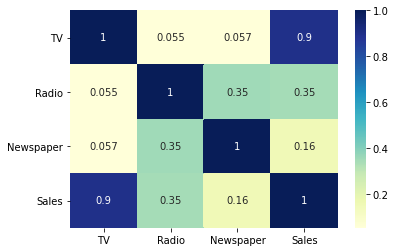

In [8]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [15]:
X = df.drop(['Radio', 'Sales','Newspaper'],axis=True)
y = df['Sales']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [17]:
X_train.head()

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7


In [18]:
y_train.head()

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
Name: Sales, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original profit", "Predict profit"])
calculation.head(5)

,Original profit,Predict profit
0,16.9,16.161091
1,22.4,17.921291
2,21.4,23.267692
3,7.3,7.848123
4,24.7,19.286679


In [22]:
print("Training Accuracy :", regressor.score(X_train, y_train))
print("Testing Accuracy :", regressor.score(X_test, y_test))

Training Accuracy : 0.799626928219267
Testing Accuracy : 0.814855389208679


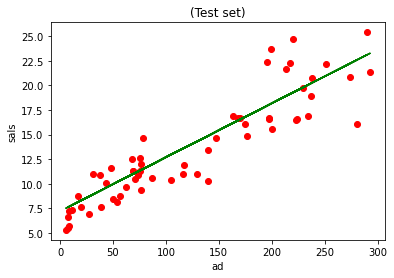

In [25]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test),color='green')
plt.title('(Test set)')
plt.xlabel('ad')
plt.ylabel('sals')
plt.show()

In [26]:
regressor.predict([[11]])

array([7.80973827])

In [27]:
regressor.predict([[150]])

array([15.43178712])

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.814855389208679

In [37]:
y_train_pred = regressor.predict(X_train)
res = (y_train - y_train_pred)


C:\Users\Qwerty\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


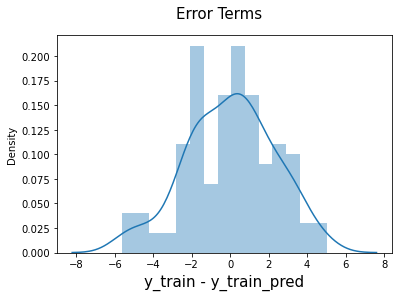

In [38]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()